In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("C:/Users/USER/sport_person_classifier/text_images/sharapova1.jpg")
img.shape

(555, 700, 3)

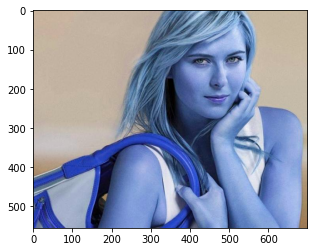

In [3]:
plt.imshow(img)

In [4]:
#converting the image to gray image without RGB  
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(555, 700)

In [5]:
face_cascade = cv2.CascadeClassifier("C:/Users/USER/sport_person_classifier/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/USER/sport_person_classifier/opencv/haarcascades/haarcascade_eye.xml")
face = face_cascade.detectMultiScale(gray_img,1.3, 5)
face

array([[352,  38, 233, 233]], dtype=int32)

In [6]:
(x,y,w,h) = face[0]
x,y,w,h

(352, 38, 233, 233)

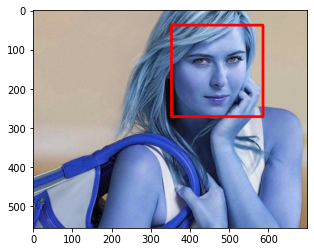

In [7]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 5)
plt.imshow(face_img)

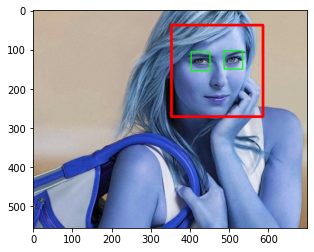

In [8]:
for (x,y,w,h) in face:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap ="gray")
plt.show()

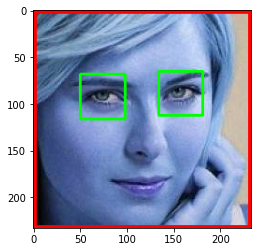

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap = "gray")

In [10]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x,y,w,h) in face:
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

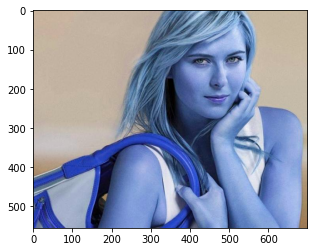

In [11]:
og = img = cv2.imread("C:/Users/USER/sport_person_classifier/text_images/sharapova1.jpg")
plt.imshow(og)

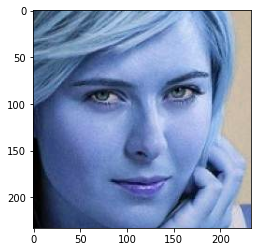

In [12]:
cropped_img = get_cropped_image("C:/Users/USER/sport_person_classifier/text_images/sharapova1.jpg")
plt.imshow(cropped_img)

In [13]:
path_data = "./dataset/"
cr_path_data = "./dataset/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [38]:
import shutil
if os.path.exists(cr_path_data):
    shutil.rmtree(cr_path_data)
    #stutil.rmtree(cr_path_data)
os.mkdir(cr_path_data)

In [39]:
cropped_image_dirs =[]
celebrity_file_name_dict ={}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    print(celebrity_name)
   
    celebrity_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = cr_path_data + celebrity_name
            if not os.path.exists(cropped_folder):
                
                os.makedirs(cropped_folder)
                
                cropped_image_dirs.append(cropped_folder)
                print("printing", cropped_folder)
            
            cropped_file_name = celebrity_name +str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1
            
            

cropped
lionel_messi
printing ./dataset/cropped/lionel_messi
maria_sharapova
printing ./dataset/cropped/maria_sharapova
roger_federer
printing ./dataset/cropped/roger_federer
serena_williams
printing ./dataset/cropped/serena_williams
virat_kohli
printing ./dataset/cropped/virat_kohli


In [40]:
import numpy as np
import pywt
import cv2

def w2d(img, mode ="haar", level = 1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    imArray = np.float32(imArray)
    imArray /= 255;
    
    
    coffs = pywt.wavedec2(imArray, mode, level = level)
    
    coffs_H = list(coffs)
    coffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

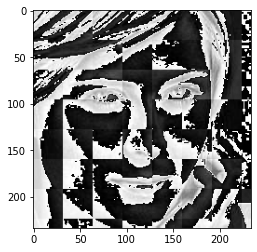

In [41]:
pop = w2d(cropped_img, "db1", 5)
plt.imshow(pop,cmap = "gray")

In [42]:
celebrity_file_name_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split("/")[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_name_dict[celebrity_name] = file_list
celebrity_file_name_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [43]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] =count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [50]:
x = []
y = []

for celebrity_name, training_file in celebrity_file_name_dict.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        
      #  if img is None:
        #    continue
        scaled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img, "db1", 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        
        combine_image = np.vstack((scaled_raw_image.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        x.append(combine_image)
        y.append(class_dict[celebrity_name])
        

In [52]:
len(x[0])

4096

In [53]:
y[0]

0

In [56]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(187, 4096)

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 1)

pipe = Pipeline([("scaler", StandardScaler()), ("scv", SVC(kernel ="rbf", C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8297872340425532

In [96]:
len(y_test)

47

In [97]:
statistics = (classification_report(y_test, pipe.predict(x_test)))
print(statistics)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.89      0.89      0.89         9
           2       1.00      0.57      0.73         7
           3       0.82      0.90      0.86        10
           4       0.69      0.82      0.75        11

    accuracy                           0.83        47
   macro avg       0.86      0.82      0.82        47
weighted avg       0.85      0.83      0.83        47



In [98]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, pipe.predict(x_test))
cm

array([[9, 0, 0, 0, 1],
       [0, 8, 0, 0, 1],
       [0, 1, 4, 1, 1],
       [0, 0, 0, 9, 1],
       [1, 0, 0, 1, 9]], dtype=int64)

Text(69.0, 0.5, 'truth')

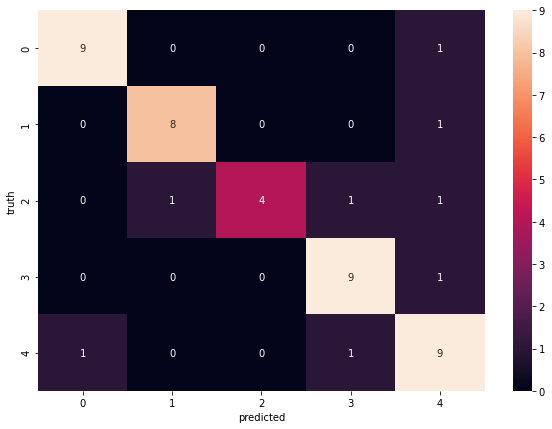

In [99]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [100]:
pop = get_cropped_image("C:/Users/USER/sport_person_classifier/text_images/sharapova1.jpg")

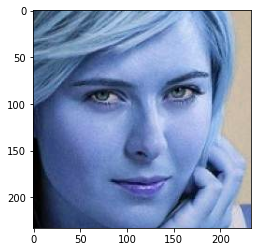

In [101]:
plt.imshow(pop, cmap = "gray")

### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [103]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [104]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.735714,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.614286,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.742857,{'logisticregression__C': 1}


In [105]:
best_estimators['svm'].score(x_test,y_test)

0.7872340425531915

In [106]:
best_estimators['random_forest'].score(x_test,y_test)

0.7659574468085106

In [107]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7659574468085106

In [108]:
best_clf = best_estimators['svm']

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[9, 0, 0, 0, 1],
       [0, 8, 0, 1, 0],
       [0, 3, 3, 1, 0],
       [0, 1, 0, 8, 1],
       [1, 0, 0, 1, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

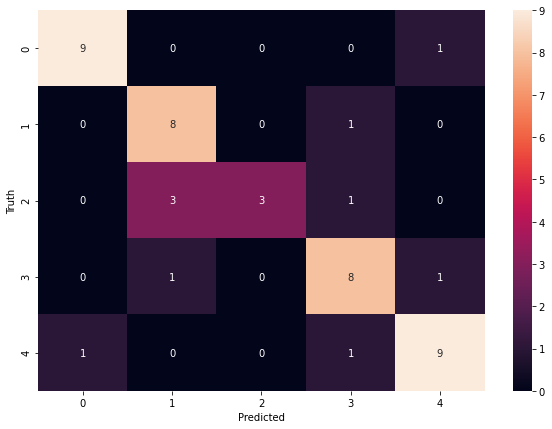

In [111]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [113]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [114]:
#Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))